### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [92]:
df = pd.read_csv("vehicle.csv")
df.dropna(inplace=True)

In [93]:
df.sample(2)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
560,105,55.0,96.0,181.0,56.0,9,219.0,30.0,25.0,175,231.0,713.0,216.0,74.0,4.0,5.0,187.0,194,car
459,98,42.0,90.0,192.0,61.0,9,178.0,37.0,21.0,144,189.0,480.0,138.0,61.0,3.0,8.0,199.0,208,car


### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [94]:
class_var = df["class"].value_counts()

### Check for any missing values in the data 

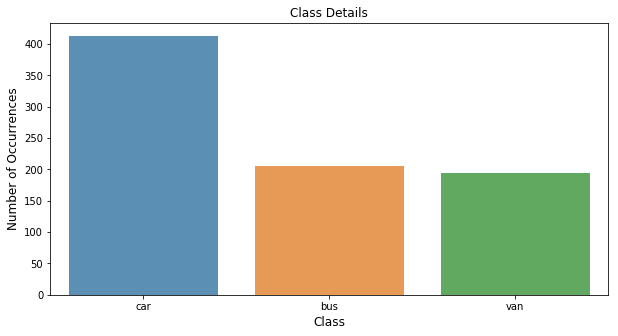

In [95]:
plt.figure(figsize=(10,5))
sns.barplot(class_var.index, class_var.values, alpha=0.8)
plt.title('Class Details')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.show()

### 3. Standardize the data 

In [96]:
x = df.drop("class",axis=1)
x_std= x.apply(stats.zscore)

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

### K - Means Clustering

### 4. Assign a dummy array called distortion

In [97]:
distortions = []

You can later use this array to plot the elbow plot

### 5. Calculating distortion - C distance

In [98]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(x_std)
    kmeanModel.fit(x_std)
    distortions.append(
        sum(np.min(cdist(x_std, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / x_std.shape[0])

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

In [99]:
distortions

[3.939299196727955,
 2.966824380205441,
 2.642794199692158,
 2.55085507119089,
 2.429932398486287,
 2.3153170099326648,
 2.242937531389373,
 2.1690697511910915,
 2.1033088250291128]

### 6. Plotting Elbow/ Scree Plot

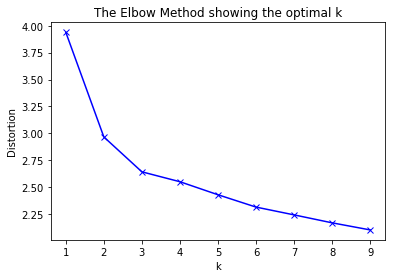

In [100]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

### Find out the optimal value of K

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [101]:
kmeans = KMeans(n_clusters=3)

In [102]:
kmeans.fit(x_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [103]:
centers = kmeans.cluster_centers_

In [104]:
centers

array([[ 1.13076532,  1.17094237,  1.19500584,  1.01909505,  0.21505188,
         0.34250798,  1.27180461, -1.19061224,  1.27548416,  1.09266768,
         1.22038121,  1.28132727,  1.07954232, -0.02879497,  0.16229031,
         0.26566456, -0.00535553,  0.18380067],
       [-0.91400071, -0.51327609, -0.88664922, -1.05602904, -0.49182906,
        -0.21883169, -0.775563  ,  0.85996991, -0.74203582, -0.47827281,
        -0.77910348, -0.78034412, -0.37943428,  0.82611912, -0.08658373,
        -0.30355495, -1.04650237, -1.10265258],
       [-0.2319252 , -0.57973847, -0.30724438, -0.02693437,  0.20516443,
        -0.11572895, -0.45873352,  0.32447256, -0.48810058, -0.54152679,
        -0.41282893, -0.46297248, -0.60799507, -0.62342017, -0.06824398,
         0.01513248,  0.82481456,  0.71018194]])

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [105]:
df_centers = pd.DataFrame(centers, columns= x_std.columns)

In [106]:
df_centers

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,1.130765,1.170942,1.195006,1.019095,0.215052,0.342508,1.271805,-1.190612,1.275484,1.092668,1.220381,1.281327,1.079542,-0.028795,0.162290,0.265665,-0.005356,0.183801
1,-0.914001,-0.513276,-0.886649,-1.056029,-0.491829,-0.218832,-0.775563,0.859970,-0.742036,-0.478273,-0.779103,-0.780344,-0.379434,0.826119,-0.086584,-0.303555,-1.046502,-1.102653
2,-0.231925,-0.579738,-0.307244,-0.026934,0.205164,-0.115729,-0.458734,0.324473,-0.488101,-0.541527,-0.412829,-0.462972,-0.607995,-0.623420,-0.068244,0.015132,0.824815,0.710182


Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [107]:
kmeans.labels_

array([2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 0, 1, 1, 2, 2, 0,
       2, 1, 0, 0, 1, 2, 2, 2, 0, 2, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 1, 1,
       1, 2, 1, 2, 0, 2, 0, 2, 2, 1, 0, 1, 0, 1, 1, 1, 2, 1, 0, 2, 0, 0,
       2, 1, 2, 0, 2, 1, 1, 0, 2, 1, 2, 0, 2, 1, 2, 1, 0, 2, 0, 2, 1, 0,
       1, 1, 0, 1, 1, 2, 2, 1, 0, 0, 1, 1, 0, 2, 2, 1, 1, 1, 2, 0, 0, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 0, 2, 2, 1, 0, 0, 1, 2, 1, 2, 2, 0,
       1, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 1, 2, 1, 0, 2, 2, 0, 0,
       2, 0, 1, 1, 0, 0, 2, 0, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 0,
       2, 0, 2, 0, 2, 1, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 2, 1, 0, 2, 2, 2,
       0, 1, 1, 0, 1, 2, 0, 1, 1, 1, 2, 0, 2, 0, 1, 1, 1, 1, 0, 2, 1, 2,
       0, 1, 2, 2, 1, 0, 1, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2, 0, 0, 1,
       2, 2, 2, 0, 1, 2, 2, 1, 1, 2, 2, 0, 2, 1, 1, 0, 2, 2, 1, 1, 0, 1,
       2, 0, 1, 2, 0, 2, 2, 0, 2, 0, 1, 2, 2, 0, 2, 2, 2, 1, 2, 0, 0, 0,
       0, 1, 2, 0, 1, 1, 1, 2, 1, 0, 0, 1, 0, 2, 1,

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [108]:
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

### 9. Combine all three arrays a,b,c into a dataframe

In [109]:
df_hierarchy = np.concatenate((a, b,c),)
df_hierarchy.shape

(250, 2)

### 10. Use scatter matrix to print all the 3 distributions

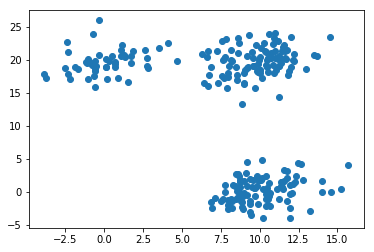

In [110]:
plt.scatter(df_hierarchy[:,0], df_hierarchy[:,1])

### 11. Find out the linkage matrix

Use ward as linkage metric and distance as Eucledian

In [111]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(df_hierarchy, 'ward', metric='euclidean')
Z

array([[1.15000000e+02, 1.19000000e+02, 5.30958288e-03, 2.00000000e+00],
       [2.07000000e+02, 2.24000000e+02, 2.45035844e-02, 2.00000000e+00],
       [2.19000000e+02, 2.33000000e+02, 3.65957311e-02, 2.00000000e+00],
       [3.60000000e+01, 9.60000000e+01, 3.85379009e-02, 2.00000000e+00],
       [2.01000000e+02, 2.46000000e+02, 4.95418116e-02, 2.00000000e+00],
       [2.20000000e+01, 2.30000000e+01, 5.16629754e-02, 2.00000000e+00],
       [1.66000000e+02, 1.91000000e+02, 6.11518857e-02, 2.00000000e+00],
       [1.70000000e+01, 3.10000000e+01, 6.88917289e-02, 2.00000000e+00],
       [1.00000000e+01, 8.90000000e+01, 7.47648105e-02, 2.00000000e+00],
       [1.63000000e+02, 1.84000000e+02, 8.54466908e-02, 2.00000000e+00],
       [1.90000000e+01, 2.40000000e+01, 9.14447560e-02, 2.00000000e+00],
       [1.53000000e+02, 2.34000000e+02, 9.28478791e-02, 2.00000000e+00],
       [2.70000000e+01, 6.30000000e+01, 1.01156914e-01, 2.00000000e+00],
       [1.50000000e+02, 2.49000000e+02, 1.10406041e

### 12. Plot the dendrogram for the consolidated dataframe

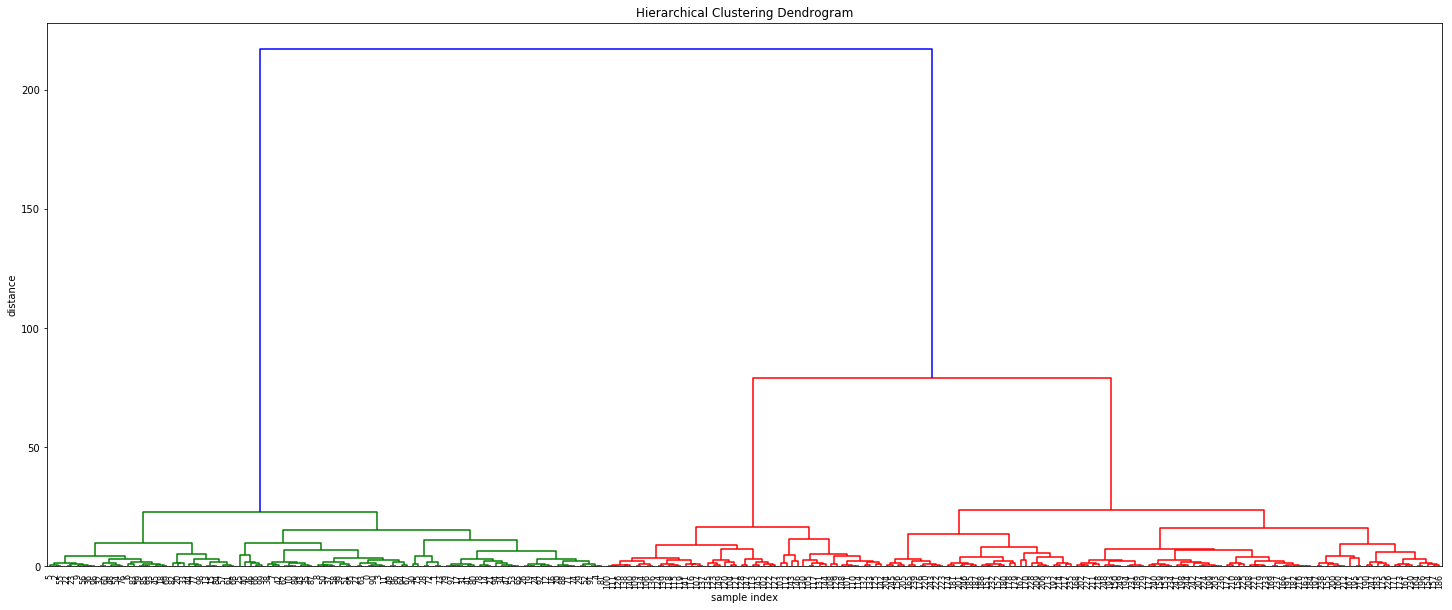

In [112]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

### 13. Recreate the dendrogram for last 12 merged clusters 

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

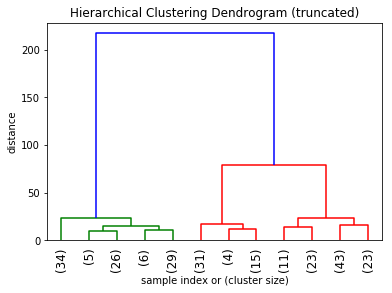

In [113]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
)
plt.show()

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [114]:
from scipy.cluster.hierarchy import fcluster
max_d = 50
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

### Use matplotlib to visually observe the clusters in 2D space 

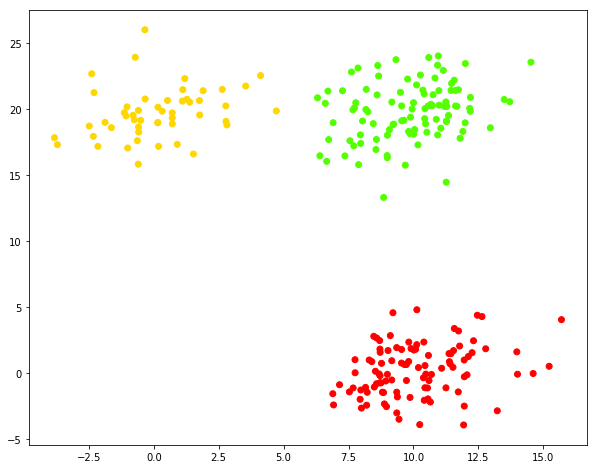

In [116]:
plt.figure(figsize=(10, 8))
plt.scatter(df_hierarchy[:,0], df_hierarchy[:,1], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()